In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [53]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [54]:
df = df.drop(columns='Id')

In [55]:
category = pd.get_dummies(df.Species)
print(category)

     Iris-setosa  Iris-versicolor  Iris-virginica
0           True            False           False
1           True            False           False
2           True            False           False
3           True            False           False
4           True            False           False
..           ...              ...             ...
145        False            False            True
146        False            False            True
147        False            False            True
148        False            False            True
149        False            False            True

[150 rows x 3 columns]


In [57]:
new_df = pd.concat([df, category], axis=1)
print(new_df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
0              5.1           3.5            1.4           0.2     Iris-setosa   
1              4.9           3.0            1.4           0.2     Iris-setosa   
2              4.7           3.2            1.3           0.2     Iris-setosa   
3              4.6           3.1            1.5           0.2     Iris-setosa   
4              5.0           3.6            1.4           0.2     Iris-setosa   
..             ...           ...            ...           ...             ...   
145            6.7           3.0            5.2           2.3  Iris-virginica   
146            6.3           2.5            5.0           1.9  Iris-virginica   
147            6.5           3.0            5.2           2.0  Iris-virginica   
148            6.2           3.4            5.4           2.3  Iris-virginica   
149            5.9           3.0            5.1           1.8  Iris-virginica   

     Iris-setosa  Iris-vers

In [58]:
new_df = new_df.drop(columns='Species')
print(new_df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Iris-setosa  \
0              5.1           3.5            1.4           0.2         True   
1              4.9           3.0            1.4           0.2         True   
2              4.7           3.2            1.3           0.2         True   
3              4.6           3.1            1.5           0.2         True   
4              5.0           3.6            1.4           0.2         True   
..             ...           ...            ...           ...          ...   
145            6.7           3.0            5.2           2.3        False   
146            6.3           2.5            5.0           1.9        False   
147            6.5           3.0            5.2           2.0        False   
148            6.2           3.4            5.4           2.3        False   
149            5.9           3.0            5.1           1.8        False   

     Iris-versicolor  Iris-virginica  
0              False    

In [62]:
dataset = new_df.values
print(dataset)

[[5.1 3.5 1.4 ... True False False]
 [4.9 3.0 1.4 ... True False False]
 [4.7 3.2 1.3 ... True False False]
 ...
 [6.5 3.0 5.2 ... False False True]
 [6.2 3.4 5.4 ... False False True]
 [5.9 3.0 5.1 ... False False True]]


In [74]:
X = dataset[:, 0:4]
y = dataset[:, 4:7]

In [75]:
print(y)

[[True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]
 [True False False]


In [64]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
print(X_scale)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [77]:
print(len(X_train), len(X_test), len(Y_train), len(Y_test))

105 45 105 45


In [87]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [88]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [78]:
import numpy as np
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)

In [80]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1093 - accuracy: 0.2952
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0661 - accuracy: 0.4571
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0280 - accuracy: 0.6762
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9955 - accuracy: 0.6952
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9635 - accuracy: 0.7048
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9353 - accuracy: 0.7048
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9036 - accuracy: 0.7048
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8734 - accuracy: 0.7048
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8418 - accuracy: 0.7048
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8104 - accuracy: 0.7048
Epoch 11/100
4/4 [===========

In [83]:
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [85]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1368 - accuracy: 0.9556


[0.1368405520915985, 0.9555555582046509]

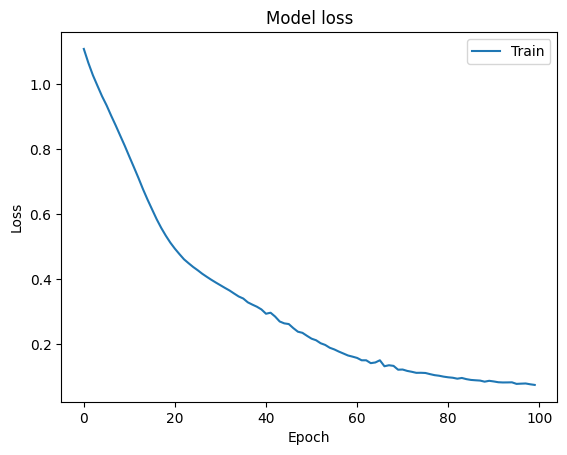

In [89]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

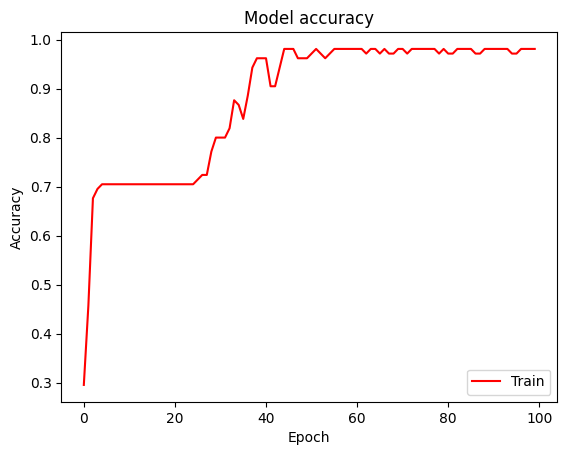

In [91]:
plt.plot(hist.history['accuracy'], c='r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()